***Name: Mansi Gharat BE Comps Div: A Roll No. 37
Sub: DL EXP 6***



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import tensorflow.keras.layers
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.datasets
import numpy
import matplotlib.pyplot


In [ ]:
x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")
encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)
encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)
encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 784)]             0         
                                                                 
 encoder_dense_1 (Dense)     (None, 300)               235500    
                                                                 
 encoder_leakyrelu_1 (Leaky  (None, 300)               0         
 ReLU)                                                           
                                                                 
 encoder_dense_2 (Dense)     (None, 2)                 602       
                                                                 
 encoder_output (LeakyReLU)  (None, 2)                 0         
                                                                 
Total params: 236102 (922.27 KB)
Trainable params: 236102 (922.27 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [ ]:
decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")
decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)
decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)
decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 2)]               0         
                                                                 
 decoder_dense_1 (Dense)     (None, 300)               900       
                                                                 
 decoder_leakyrelu_1 (Leaky  (None, 300)               0         
 ReLU)                                                           
                                                                 
 decoder_dense_2 (Dense)     (None, 784)               235984    
                                                                 
 decoder_output (LeakyReLU)  (None, 784)               0         
                                                                 
Total params: 236884 (925.33 KB)
Trainable params: 236884 (925.33 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [ ]:
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)
ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 AE_input (InputLayer)       [(None, 784)]             0         
                                                                 
 encoder_model (Functional)  (None, 2)                 236102    
                                                                 
 decoder_model (Functional)  (None, 784)               236884    
                                                                 
Total params: 472986 (1.80 MB)
Trainable params: 472986 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def rmse(y_true, y_predict):
    return tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict))

In [ ]:
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))

In [ ]:
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

In [ ]:
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 6s 22ms/step - loss: 0.0581 - val_loss: 0.0544
Epoch 2/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0535 - val_loss: 0.0522
Epoch 3/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0518 - val_loss: 0.0508
Epoch 4/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0506 - val_loss: 0.0502
Epoch 5/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0497 - val_loss: 0.0491
Epoch 6/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0490 - val_loss: 0.0485
Epoch 7/20
235/235 [==============================] - 5s 22ms/step - loss: 0.0484 - val_loss: 0.0485
Epoch 8/20
235/235 [==============================] - 4s 19ms/step - loss: 0.0479 - val_loss: 0.0477
Epoch 9/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0475 - val_loss: 0.0473
Epoch 10/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0472 - val_lo

In [ ]:
encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

1875/1875 [==============================] - 7s 4ms/step


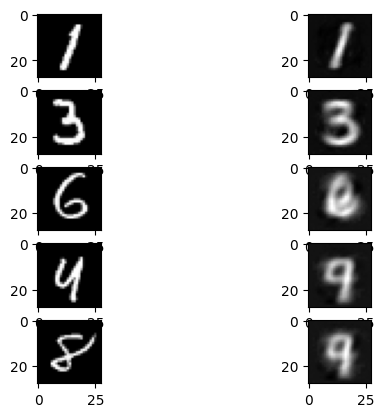

In [ ]:
num_images_to_show = 5
for im_ind in range(num_images_to_show):
  plot_ind = im_ind*2 + 1
  rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
  matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
  matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
  matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
  matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

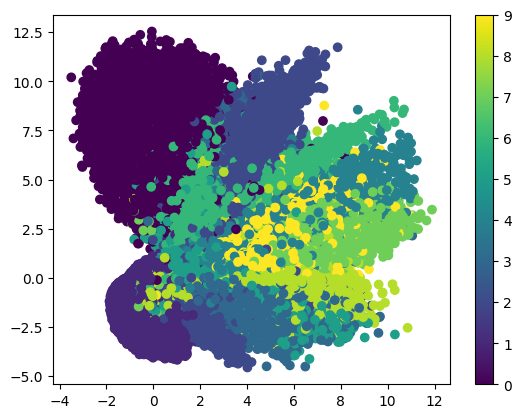

In [ ]:
matplotlib.pyplot.figure()
matplotlib.pyplot.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train)
matplotlib.pyplot.colorbar()